In [252]:
import pandas as pd
import numpy as np
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
df_lockdown = pd.read_csv('/project_data/data_asset/sun/stringency/OxCGRT_latest.csv')
df_lockdown['Date'] = pd.to_datetime(df_lockdown['Date'].astype(str))

df_lockdown.set_index(pd.MultiIndex.from_frame(df_lockdown[['CountryName','Date']]),inplace=True)
df_lockdown.drop(['CountryName','Date','CountryCode'],axis=1,inplace=True)
df_lockdown.head()

C1_School closing  C1_Flag  C2_Workplace closing  \
CountryName Date                                                           
Aruba       2020-01-01                0.0      NaN                   0.0   
            2020-01-02                0.0      NaN                   0.0   
            2020-01-03                0.0      NaN                   0.0   
            2020-01-04                0.0      NaN                   0.0   
            2020-01-05                0.0      NaN                   0.0   

                        C2_Flag  C3_Cancel public events  C3_Flag  \
CountryName Date                                                    
Aruba       2020-01-01      NaN                      0.0      NaN   
            2020-01-02      NaN                      0.0      NaN   
            2020-01-03      NaN                      0.0      NaN   
            2020-01-04      NaN                      0.0      NaN   
            2020-01-05      NaN                      0.0      NaN   

                        C4_Restrictions on gatherings  C4_Flag  \
CountryName Date                                                 
Aruba       2020-01-01                            0.0      NaN   
            2020-01-02                            0.0      NaN   
            2020-01-03                            0.0      NaN   
            2020-01-04                            0.0      NaN   
            2020-01-05                            0.0      NaN   

                        C5_Close public transport  C5_Flag  ...  \
CountryName Date                                            ...   
Aruba       2020-01-01                        0.0      NaN  ...   
            2020-01-02                        0.0      NaN  ...   
            2020-01-03                        0.0      NaN  ...   
            2020-01-04                        0.0      NaN  ...   
            2020-01-05                        0.0      NaN  ...   

                        StringencyIndex  StringencyIndexForDisplay  \
CountryName Date                                                     
Aruba       2020-01-01              0.0                        0.0   
            2020-01-02              0.0                        0.0   
            2020-01-03              0.0                        0.0   
            2020-01-04              0.0                        0.0   
            2020-01-05              0.0                        0.0   

                        StringencyLegacyIndex  \
CountryName Date                                
Aruba       2020-01-01                    0.0   
            2020-01-02                    0.0   
            2020-01-03                    0.0   
            2020-01-04                    0.0   
            2020-01-05                    0.0   

                        StringencyLegacyIndexForDisplay  \
CountryName Date                                          
Aruba       2020-01-01                              0.0   
            2020-01-02                              0.0   
            2020-01-03                              0.0   
            2020-01-04                              0.0   
            2020-01-05                              0.0   

                        GovernmentResponseIndex  \
CountryName Date                                  
Aruba       2020-01-01                      0.0   
            2020-01-02                      0.0   
            2020-01-03                      0.0   
            2020-01-04                      0.0   
            2020-01-05                      0.0   

                        GovernmentResponseIndexForDisplay  \
CountryName Date                                            
Aruba       2020-01-01                                0.0   
            2020-01-02                                0.0   
            2020-01-03                                0.0   
            2020-01-04                                0.0   
            2020-01-05                                0.0   

                        ContainmentHeal

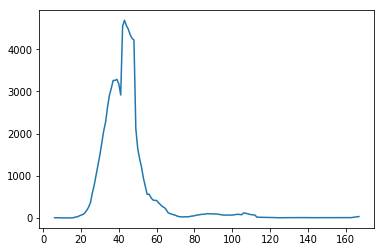

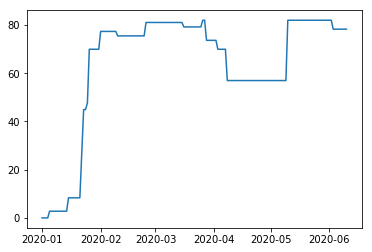

In [166]:
plt.plot(np.diff(df_lockdown.loc['China']['ConfirmedCases'].rolling(7).mean()))
plt.figure()
plt.plot(df_lockdown.loc['China']['StringencyIndex'])

In [167]:
np.corrcoef(np.hstack([0,(np.diff(df_lockdown.loc['China']['ConfirmedCases'].rolling(50).mean().replace(np.nan,0)))]),df_lockdown.loc['China']['StringencyIndex'].replace(np.nan,0))

array([[1.       , 0.2103472],
       [0.2103472, 1.       ]])

In [168]:
def find_max_corr_filt(sig1,sig2,min_delay=1,max_delay=100):
    arr_cov_values = np.zeros(max_delay-min_delay+1)
    for ctr,delay in enumerate(range(min_delay,max_delay+1)):
        arr_cov_values[ctr] = np.corrcoef(np.hstack([0,(np.diff(sig1.rolling(delay).mean().replace(np.nan,0)))]),sig2.replace(np.nan,0))[0,1]
    
    return arr_cov_values

def find_max_cross_corr(sig1,sig2,min_delay=1,max_delay=100):
    arr_cov_values = np.zeros(max_delay-min_delay+1)
    for ctr,delay in enumerate(range(min_delay,max_delay+1)):
        #print(sig1.replace(np.nan,0).values)
        #shifted_sig = shift(sig1.replace(np.nan,0).values,delay,0)
        #print(shift(sig1.replace(np.nan,0),delay,0))
        arr_cov_values[ctr] = np.corrcoef(sig1.shift(periods=delay,fill_value=0),sig2.replace(np.nan,0))[0,1]
    
    return arr_cov_values
    
        
    

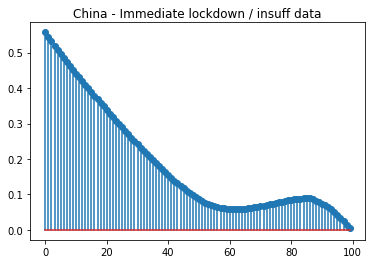

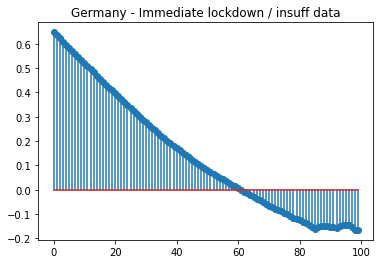

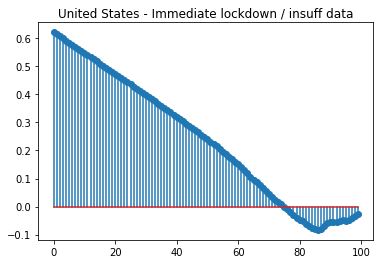

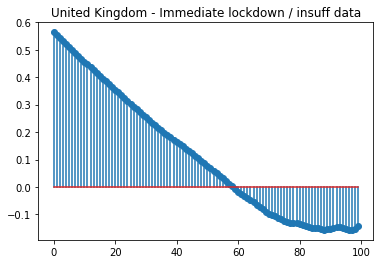

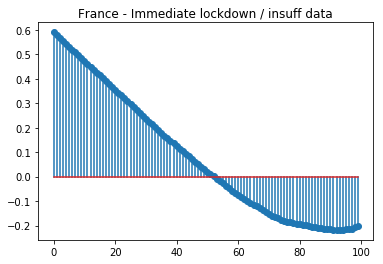

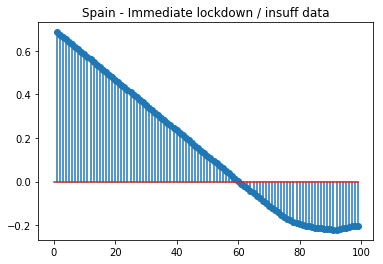

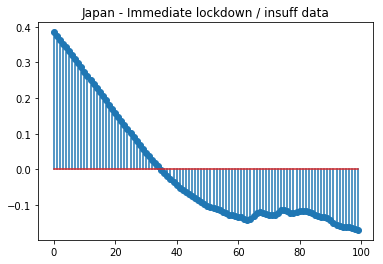

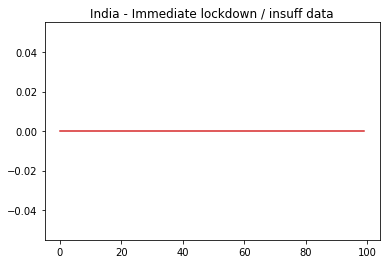

In [169]:
coi = ['China','Germany','United States','United Kingdom','France','Spain','Japan','India']

for _country in coi:
    resp_tc_cnt = (find_max_cross_corr(df_lockdown.loc[_country]['ConfirmedCases'],df_lockdown.loc[_country]['StringencyIndex']))
    plt.figure()
    plt.stem(resp_tc_cnt);
    time_delay = np.argmax(resp_tc_cnt)
    
    if time_delay < 0.1*(100-1):
        plt.title('%s - Immediate lockdown / insuff data'%(_country))
    else:
        plt.title('%s has max lag %s'%(_country,np.argmax(resp_tc_cnt)))


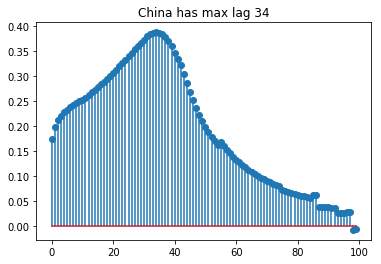

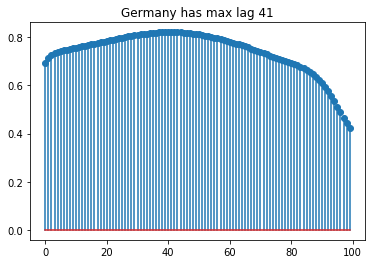

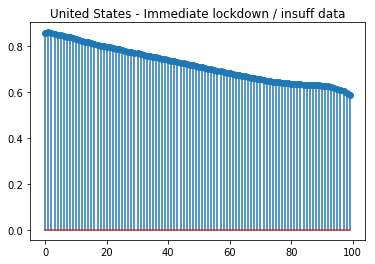

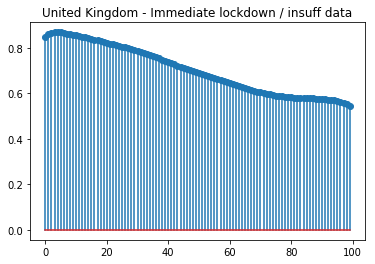

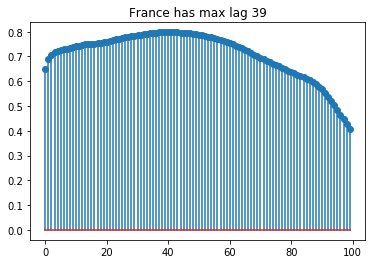

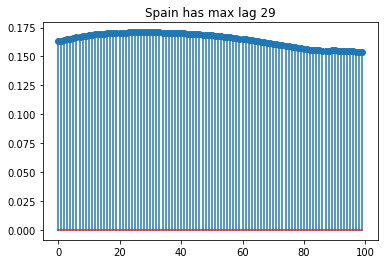

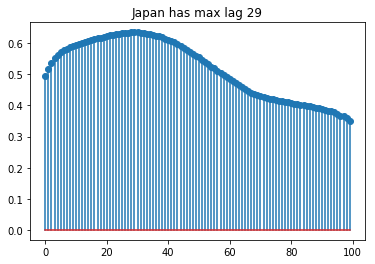

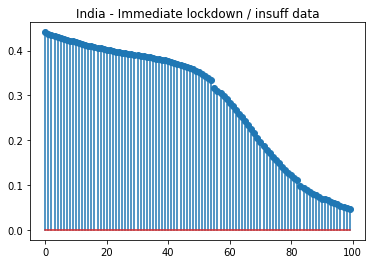

In [170]:

coi = ['China','Germany','United States','United Kingdom','France','Spain','Japan','India']

for _country in coi:
    resp_tc_cnt = (find_max_corr_filt(df_lockdown.loc[_country]['ConfirmedCases'],df_lockdown.loc[_country]['StringencyIndex']))
    plt.figure()
    plt.stem(resp_tc_cnt);
    time_delay = np.argmax(resp_tc_cnt)
    
    if time_delay < 0.1*(100-1):
        plt.title('%s - Immediate lockdown / insuff data'%(_country))
    else:
        plt.title('%s has max lag %s'%(_country,np.argmax(resp_tc_cnt)))



In [172]:
ls /project_data/data_asset/sun/economy/

Eurostat_Consumeindex.xls
Eurostat_Econsent.xls
Eurostat_GDP.xls
Eurostat_ProductionIndex.xlsx
Eurostat_Table_Retail-TO.xlsx
Eurostat_Table_teibs010FlagNoDesc_3ea9a265-f1bb-4f14-8cbe-3d863895b54f.xls


In [227]:
df_econ_prod = pd.read_excel('/project_data/data_asset/sun/economy/Eurostat_ProductionIndex.xlsx',sheet_name='Sheet 1',skiprows=list(range(9))+[10])
cols_to_keep = [_colname for _colname in df_econ_prod.columns if 'Unnamed' not in _colname]
df_econ_prod = df_econ_prod[cols_to_keep]
df_econ_prod.index = df_econ_prod['TIME'].values
df_econ_prod.drop('TIME',axis=1,inplace=True)
df_econ_prod.dropna(inplace=True)
df_econ_prod = df_econ_prod.T

,Euro area - 19 countries (from 2015),European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,...,Slovakia,Finland,Sweden,United Kingdom,Norway,Switzerland,Montenegro,North Macedonia,Serbia,Turkey
2019-05,105.1,106.8,106.2,113.8,108.1,115.3,118.1,101.8,116.8,98.9,...,115.3,111.8,110.7,102.2,96.2,115.9,98.1,111.6,110.6,114.1
2019-06,103.8,105.3,104.9,118.1,106.1,112,109.4,100.4,110.2,94.4,...,114,113.2,110.7,102.3,94.5,118.3,119.4,111.4,109.5,110.1
2019-07,103.7,105.4,105,110.3,106.9,112.5,113.7,100.2,107.9,98.7,...,113.4,114.1,111.2,102.2,95.6,117.3,114.4,115.4,113.2,115.4
2019-08,103.8,105.3,104.8,116.9,106.8,112.1,110,100.4,111.1,97.8,...,110.2,114.4,112,101.6,93.8,116.1,109.6,115.2,111.4,112.1
2019-09,104,105.7,105.1,115.4,107.2,113.5,112.6,99.6,108.8,105.3,...,111.6,113.7,110.9,101.6,94.3,118.1,114.8,115.6,112,115.9
2019-10,103.6,105.3,104.8,113.1,108.3,113.4,109.7,98.7,107.8,108,...,111.6,113,109.9,101.8,97.3,117.5,106,114.7,112,114.9
2019-11,103.1,104.8,104.3,114.3,107.3,112.2,104,99.5,109.3,96,...,111.8,113.2,111.4,100.7,99.8,116.9,109.8,110.3,113.3,115.8
2019-12,101.3,103.1,102.8,116.8,105.5,111.2,111.7,97.9,108.5,90.2,...,110.1,113.1,109.9,100.6,101.1,111,124.2,108.1,112.8,117.9
2020-01,103.2,105,104.4,111.9,107.8,112.2,107.7,99.7,106.6,96,...,115.2,111.4,111.3,100.4,98.6,118,118.1,114.1,114.8,117.6
2020-02,103.1,105.1,:,112.6,108.7,112.6,109.5,100.1,116.6,95.8,...,114.3,112,111.2,100.3,101.1,115.6,104.4,114.8,112.9,119.8


In [206]:
df_econ_retail = pd.read_excel('/project_data/data_asset/sun/economy/Eurostat_Table_Retail-TO.xlsx',sheet_name='Sheet 1',skiprows=list(range(9))+[10])
cols_to_keep = [_colname for _colname in df_econ_retail.columns if 'Unnamed' not in _colname]
df_econ_retail = df_econ_retail[cols_to_keep]
df_econ_retail.dropna()
df_econ_retail.index = df_econ_retail['TIME'].values
df_econ_retail.drop('TIME',axis=1,inplace=True)
df_econ_retail.dropna(inplace=True)
df_econ_retail

,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04
Euro area - 19 countries (from 2015),110.4,111.4,111.1,111.9,111.4,111.4,112.6,111.6,112.8,113.5,100.7,89
European Union - 27 countries (from 2020),112.2,113.4,113.1,113.9,113.4,113.5,114.8,113.9,115.3,115.9,103.9,92.6
European Union - 28 countries (2013-2020),113.2,114.6,114.3,114.8,114.2,114.1,114.7,114.0,115.3,:,:,:
Belgium,105.6,105.8,105.9,105.8,102.9,105.0,109.7,103.8,105.0,107.3,95.1,90.2
Bulgaria,125,125.3,126.6,126.9,127.6,128.0,129.2,130.8,131.6,133,106.4,103.1
Czechia,123.9,126.1,125.7,126.0,126.8,127.2,127.7,128.6,130.8,130.8,117.2,112.6
Denmark,103,104.6,103.8,103.8,104.0,103.4,103.9,103.4,104.3,103.8,101.4,100.1
Germany (until 1990 former territory of the FRG),113.3,115.7,115.1,115.4,115.5,114.8,116.9,115.3,117.3,118.6,115.3,108.1
Estonia,123.3,123.6,123.8,125.0,125.0,124.5,126.0,123.8,124.9,129.5,124.6,109.4
Ireland,108.9,109.0,109.8,109.9,110.8,110.2,109.7,110.6,111.0,110.5,110.2,85.7


In [253]:
df_econ_gdp = pd.read_excel('/project_data/data_asset/sun/economy/Eurostat_GDP.xls',skiprows=list(range(210)))
cols_to_keep = [_colname for _colname in df_econ_gdp.columns if 'Unnamed' not in _colname]
df_econ_gdp = df_econ_gdp[cols_to_keep]
df_econ_gdp.dropna()
df_econ_gdp.index = df_econ_gdp['GEO/TIME'].values
df_econ_gdp.drop('GEO/TIME',axis=1,inplace=True)
df_econ_gdp.dropna(inplace=True)
df_econ_gdp

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1
European Union - 27 countries (from 2020),2.9,3.1,3.1,3.3,1.4,1.8,1.1,1.9,2.3,0.6,1.4,0.4,-12.1
European Union - 28 countries (2013-2020),2.8,2.8,2.8,3,1.2,1.9,1.3,1.7,2.3,0.5,1.5,0.4,:
Euro area - 19 countries (from 2015),2.7,2.9,3.1,3.3,1,1.5,0.8,1.6,2,0.4,1.2,0.2,-13.6
Belgium,3,1.2,0.5,3.3,0.9,1.2,0.7,3.2,0.4,1.2,1.6,1.9,-13.6
Bulgaria,3.3,3.4,3.3,2.9,2.5,3.8,4,3.3,4,2.7,2.7,3.1,1.2
Czechia,5.8,10.1,2,2.6,2,2.4,2.5,3.6,2.6,2,1.7,1.9,-12.7
Denmark,2.5,1.7,-3.4,3.6,5.4,1.3,2.1,3.2,1.5,3.8,1.8,1.7,-8
Germany (until 1990 former territory of the FRG),4.8,2.3,3.5,3,0.5,1.6,-0.4,0.8,1.9,-1,1.1,-0.4,-8.6
Estonia,7,6.3,2.5,5.1,5.4,4.6,4.4,5.5,4,3.7,4.8,3.5,-14
Ireland,-21.3,15.2,22.2,14.5,-2,9.9,7.3,0.2,12.1,-2.2,8.7,7.1,4.7


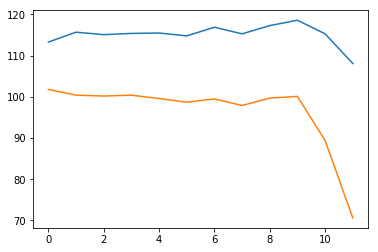

In [246]:
plt.plot(df_econ_retail[df_econ_retail.index=='Germany (until 1990 former territory of the FRG)'].T.values.flatten())
plt.plot(df_econ_prod[df_econ_prod.index=='Germany (until 1990 former territory of the FRG)'].T.values.flatten())

In [251]:
np.corrcoef(df_econ_retail[df_econ_retail.index=='Germany (until 1990 former territory of the FRG)'].T.values.flatten().astype(float),
            df_econ_prod[df_econ_prod.index=='Germany (until 1990 former territory of the FRG)'].T.values.flatten().astype(float))

array([[1.        , 0.80375171],
       [0.80375171, 1.        ]])